In [35]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
dfCancerDataInitial =  pd.DataFrame()

Load database

In [3]:
def loadNewCancerData(shName):

    dfNewCancerData = pd.read_excel("Data/US cancer data/US cancer data.xlsx",sheet_name = shName,
                             usecols = [1,3,5,8,9])

    return(dfNewCancerData)

In [4]:
for shName in ["Brain","Breast","Lung","Leukemia","Skin","Prostate"]:
    dfCancerDataInitial = dfCancerDataInitial.append(loadNewCancerData(shName))

In [5]:
dfCancerDataInitial.head()

,Leading Cancer Sites,States,Year,Age Groups Code,Count
0,Brain and Other Nervous System,Alabama,1999.0,35-39,19.0
1,Brain and Other Nervous System,Alabama,1999.0,40-44,17.0
2,Brain and Other Nervous System,Alabama,1999.0,45-49,21.0
3,Brain and Other Nervous System,Alabama,1999.0,50-54,24.0
4,Brain and Other Nervous System,Alabama,1999.0,55-59,23.0


Check data loaded correctly

In [6]:
dfCancerDataInitial['Leading Cancer Sites'].unique()

array(['Brain and Other Nervous System', nan, 'Breast',
       'Lung and Bronchus', 'Leukemias', 'Melanoma of the Skin',
       'Prostate'], dtype=object)

In [7]:
dfCancerData = dfCancerDataInitial.dropna()
dfCancerData['Leading Cancer Sites'].unique()

array(['Brain and Other Nervous System', 'Breast', 'Lung and Bronchus',
       'Leukemias', 'Melanoma of the Skin', 'Prostate'], dtype=object)

In [8]:
#count number of cases in each cancer type

for c in dfCancerData['Leading Cancer Sites'].unique():
    print(c, " length is ", len(dfCancerData[dfCancerData['Leading Cancer Sites']==c]))

Brain and Other Nervous System  length is  6406
Breast  length is  9658
Lung and Bronchus  length is  8039
Leukemias  length is  8124
Melanoma of the Skin  length is  9049
Prostate  length is  7392


Data preproccesing

In [9]:
dfCancerData.columns = ['cancer', 'state','year','ageGroup','count']

In [10]:
cancerDescriptionConverter = {"Brain and Other Nervous System":"Brain",
                             "Breast":"Breast",
                             "Lung and Bronchus":"Lung",
                             "Leukemias":"Leukemia",
                             "Melanoma of the Skin":"Skin",
                             "Prostate":"Prostate"}

In [11]:
dfCancerData['cancer'] = dfCancerData['cancer'].map(cancerDescriptionConverter)
dfCancerData.cancer.unique()

C:\Users\yael_\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['Brain', 'Breast', 'Lung', 'Leukemia', 'Skin', 'Prostate'],
      dtype=object)

In [12]:
dfCancerData.ageGroup.unique()

array(['35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '30-34',
       datetime.datetime(2018, 5, 9, 0, 0), '85+',
       datetime.datetime(2018, 10, 14, 0, 0), '25-29', '15-19',
       datetime.datetime(2018, 1, 4, 0, 0), '20-24', 1], dtype=object)

In [13]:
dfCancerDataTest = dfCancerData[['cancer','ageGroup']]

for index, row in dfCancerDataTest.iterrows():
    if isinstance( row['ageGroup'], datetime.datetime):
        row['ageGroup'] = str(row['ageGroup'].month) + "-" + str(row['ageGroup'].day)
    
dfCancerDataTest.ageGroup.unique()

array(['35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '30-34', '5-9', '85+', '10-14', '25-29',
       '15-19', '1-4', '20-24', 1], dtype=object)

In [14]:
dfCancerData['ageGroup'] = dfCancerDataTest['ageGroup']

C:\Users\yael_\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
dfCancerData.ageGroup.unique()

array(['35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '30-34', '5-9', '85+', '10-14', '25-29',
       '15-19', '1-4', '20-24', 1], dtype=object)

In [16]:
dfCancerDataOverallCases = dfCancerData[['cancer','year','count']].groupby(['cancer','year']).mean()

dfCancerDataOverallCases.head(20)

count
cancer year              
Brain  1999.0   41.538043
       2000.0   41.458445
       2001.0   40.506460
       2002.0   42.000000
       2003.0   41.900763
       2004.0   42.151365
       2005.0   43.578811
       2006.0   42.384988
       2007.0   43.216019
       2008.0   44.268949
       2009.0   44.772616
       2010.0   44.766585
       2011.0   44.248193
       2012.0   44.707434
       2013.0   46.185366
       2014.0   44.668246
Breast 1999.0  341.153713
       2000.0  345.330420
       2001.0  336.603333
       2002.0  344.917526

In [17]:
dfCancerData['meanByCancerAndYear'] = dfCancerData[['cancer','year','count']].groupby(['cancer','year']).transform('mean')

dfCancerData.head(20)

C:\Users\yael_\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cancer,state,year,ageGroup,count,meanByCancerAndYear
0,Brain,Alabama,1999.0,35-39,19.0,41.538043
1,Brain,Alabama,1999.0,40-44,17.0,41.538043
2,Brain,Alabama,1999.0,45-49,21.0,41.538043
3,Brain,Alabama,1999.0,50-54,24.0,41.538043
4,Brain,Alabama,1999.0,55-59,23.0,41.538043
5,Brain,Alabama,1999.0,60-64,31.0,41.538043
6,Brain,Alabama,1999.0,65-69,33.0,41.538043
7,Brain,Alabama,1999.0,70-74,26.0,41.538043
8,Brain,Alabama,1999.0,75-79,29.0,41.538043
9,Brain,Alabama,2000.0,35-39,19.0,41.458445


In [18]:
dfCancerData[dfCancerData.cancer=='Breast'].head(20)

,cancer,state,year,ageGroup,count,meanByCancerAndYear
0,Breast,Alabama,1999.0,30-34,54.0,341.153713
1,Breast,Alabama,1999.0,35-39,138.0,341.153713
2,Breast,Alabama,1999.0,40-44,222.0,341.153713
3,Breast,Alabama,1999.0,45-49,281.0,341.153713
4,Breast,Alabama,1999.0,50-54,365.0,341.153713
5,Breast,Alabama,1999.0,55-59,330.0,341.153713
6,Breast,Alabama,1999.0,60-64,357.0,341.153713
7,Breast,Alabama,1999.0,65-69,332.0,341.153713
8,Breast,Alabama,1999.0,70-74,344.0,341.153713
9,Breast,Alabama,1999.0,75-79,279.0,341.153713


In [19]:
dfCancerData['meanByYear'] = dfCancerData.loc[:, ['year','count']].groupby(['year']).transform('mean')

dfCancerData.head(20)

C:\Users\yael_\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cancer,state,year,ageGroup,count,meanByCancerAndYear,meanByYear
0,Brain,Alabama,1999.0,35-39,19.0,41.538043,236.802982
1,Brain,Alabama,1999.0,40-44,17.0,41.538043,236.802982
2,Brain,Alabama,1999.0,45-49,21.0,41.538043,236.802982
3,Brain,Alabama,1999.0,50-54,24.0,41.538043,236.802982
4,Brain,Alabama,1999.0,55-59,23.0,41.538043,236.802982
5,Brain,Alabama,1999.0,60-64,31.0,41.538043,236.802982
6,Brain,Alabama,1999.0,65-69,33.0,41.538043,236.802982
7,Brain,Alabama,1999.0,70-74,26.0,41.538043,236.802982
8,Brain,Alabama,1999.0,75-79,29.0,41.538043,236.802982
9,Brain,Alabama,2000.0,35-39,19.0,41.458445,238.562763


In [28]:
years = [1999,2000]

for y in years:
    for c in dfCancerData.cancer.unique():
        print("year ", y, " cancer ", c)
        dfTemp = dfCancerData.loc[(dfCancerData.year==y) & (dfCancerData.cancer==c)]
        print(dfTemp["meanByCancerAndYear"].mean())

year  1999  cancer  Brain
41.53804347826087
year  1999  cancer  Breast
341.15371329879105
year  1999  cancer  Lung
387.16837782340855
year  1999  cancer  Leukemia
69.10000000000002
year  1999  cancer  Skin
77.93625498007967
year  1999  cancer  Prostate
453.57308584686774
year  2000  cancer  Brain
41.45844504021448
year  2000  cancer  Breast
345.33041958041946
year  2000  cancer  Lung
385.66260162601617
year  2000  cancer  Leukemia
71.93736501079913
year  2000  cancer  Skin
82.06370656370656
year  2000  cancer  Prostate
465.0368663594471


In [30]:
dfCancerData['meanByYearCancerState'] = dfCancerData.loc[:, ['cancer','state','year','count']].groupby(['cancer','state','year']).transform('mean')

dfCancerData.head(20)

C:\Users\yael_\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cancer,state,year,ageGroup,count,meanByCancerAndYear,meanByYear,meanByYearCancerState
0,Brain,Alabama,1999.0,35-39,19.0,41.538043,236.802982,24.777778
1,Brain,Alabama,1999.0,40-44,17.0,41.538043,236.802982,24.777778
2,Brain,Alabama,1999.0,45-49,21.0,41.538043,236.802982,24.777778
3,Brain,Alabama,1999.0,50-54,24.0,41.538043,236.802982,24.777778
4,Brain,Alabama,1999.0,55-59,23.0,41.538043,236.802982,24.777778
5,Brain,Alabama,1999.0,60-64,31.0,41.538043,236.802982,24.777778
6,Brain,Alabama,1999.0,65-69,33.0,41.538043,236.802982,24.777778
7,Brain,Alabama,1999.0,70-74,26.0,41.538043,236.802982,24.777778
8,Brain,Alabama,1999.0,75-79,29.0,41.538043,236.802982,24.777778
9,Brain,Alabama,2000.0,35-39,19.0,41.458445,238.562763,24.333333


In [31]:
dfCancerData['meanByYearState'] = dfCancerData.loc[:, ['state','year','count']].groupby(['state','year']).transform('mean')

dfCancerData.head(20)

C:\Users\yael_\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,cancer,state,year,ageGroup,count,meanByCancerAndYear,meanByYear,meanByYearCancerState,meanByYearState
0,Brain,Alabama,1999.0,35-39,19.0,41.538043,236.802982,24.777778,157.218750
1,Brain,Alabama,1999.0,40-44,17.0,41.538043,236.802982,24.777778,157.218750
2,Brain,Alabama,1999.0,45-49,21.0,41.538043,236.802982,24.777778,157.218750
3,Brain,Alabama,1999.0,50-54,24.0,41.538043,236.802982,24.777778,157.218750
4,Brain,Alabama,1999.0,55-59,23.0,41.538043,236.802982,24.777778,157.218750
5,Brain,Alabama,1999.0,60-64,31.0,41.538043,236.802982,24.777778,157.218750
6,Brain,Alabama,1999.0,65-69,33.0,41.538043,236.802982,24.777778,157.218750
7,Brain,Alabama,1999.0,70-74,26.0,41.538043,236.802982,24.777778,157.218750
8,Brain,Alabama,1999.0,75-79,29.0,41.538043,236.802982,24.777778,157.218750
9,Brain,Alabama,2000.0,35-39,19.0,41.458445,238.562763,24.333333,164.047619


In [32]:
dfCancerData['stateToCountryByCancer'] = (dfCancerData['meanByYearCancerState'] - dfCancerData['meanByCancerAndYear'])/dfCancerData['meanByCancerAndYear']

dfCancerData['stateToCountryOverall'] = (dfCancerData['meanByYearState'] - dfCancerData['meanByYear'])/dfCancerData['meanByYear']

dfCancerData.head(20)

C:\Users\yael_\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yael_\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cancer,state,year,ageGroup,count,meanByCancerAndYear,meanByYear,meanByYearCancerState,meanByYearState,stateToCountryByCancer,stateToCountryOverall
0,Brain,Alabama,1999.0,35-39,19.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
1,Brain,Alabama,1999.0,40-44,17.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
2,Brain,Alabama,1999.0,45-49,21.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
3,Brain,Alabama,1999.0,50-54,24.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
4,Brain,Alabama,1999.0,55-59,23.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
5,Brain,Alabama,1999.0,60-64,31.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
6,Brain,Alabama,1999.0,65-69,33.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
7,Brain,Alabama,1999.0,70-74,26.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
8,Brain,Alabama,1999.0,75-79,29.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
9,Brain,Alabama,2000.0,35-39,19.0,41.458445,238.562763,24.333333,164.047619,-0.413067,-0.312350


In [33]:
dropColumns = ['count', 'ageGroup']

dfCancerDataForVisualization = dfCancerData.drop(dropColumns, axis=1)

In [34]:
dfCancerDataForVisualization = dfCancerDataForVisualization.drop_duplicates()

dfCancerDataForVisualization.head(20)

,cancer,state,year,meanByCancerAndYear,meanByYear,meanByYearCancerState,meanByYearState,stateToCountryByCancer,stateToCountryOverall
0,Brain,Alabama,1999.0,41.538043,236.802982,24.777778,157.218750,-0.403492,-0.336078
9,Brain,Alabama,2000.0,41.458445,238.562763,24.333333,164.047619,-0.413067,-0.312350
18,Brain,Alabama,2001.0,40.506460,237.329626,26.444444,171.292308,-0.347155,-0.278251
27,Brain,Alabama,2002.0,42.000000,239.881419,23.666667,165.029851,-0.436508,-0.312036
36,Brain,Alabama,2003.0,41.900763,231.594933,24.500000,171.301587,-0.415285,-0.260340
46,Brain,Alabama,2004.0,42.151365,231.511885,23.545455,168.250000,-0.441407,-0.273255
57,Brain,Alabama,2005.0,43.578811,235.717724,28.000000,186.444444,-0.357486,-0.209035
64,Brain,Alabama,2006.0,42.384988,242.605747,26.714286,198.741935,-0.369723,-0.180803
71,Brain,Alabama,2007.0,43.216019,250.760013,28.555556,193.681818,-0.339237,-0.227621
80,Brain,Alabama,2008.0,44.268949,250.676660,31.666667,198.208955,-0.284675,-0.209304


In [55]:

df = dfCancerDataForVisualization[['state','year','stateToCountryOverall']]

df = df.drop_duplicates()

df.head(20)

,state,year,stateToCountryOverall
0,Alabama,1999.0,-0.336078
9,Alabama,2000.0,-0.312350
18,Alabama,2001.0,-0.278251
27,Alabama,2002.0,-0.312036
36,Alabama,2003.0,-0.260340
46,Alabama,2004.0,-0.273255
57,Alabama,2005.0,-0.209035
64,Alabama,2006.0,-0.180803
71,Alabama,2007.0,-0.227621
80,Alabama,2008.0,-0.209304


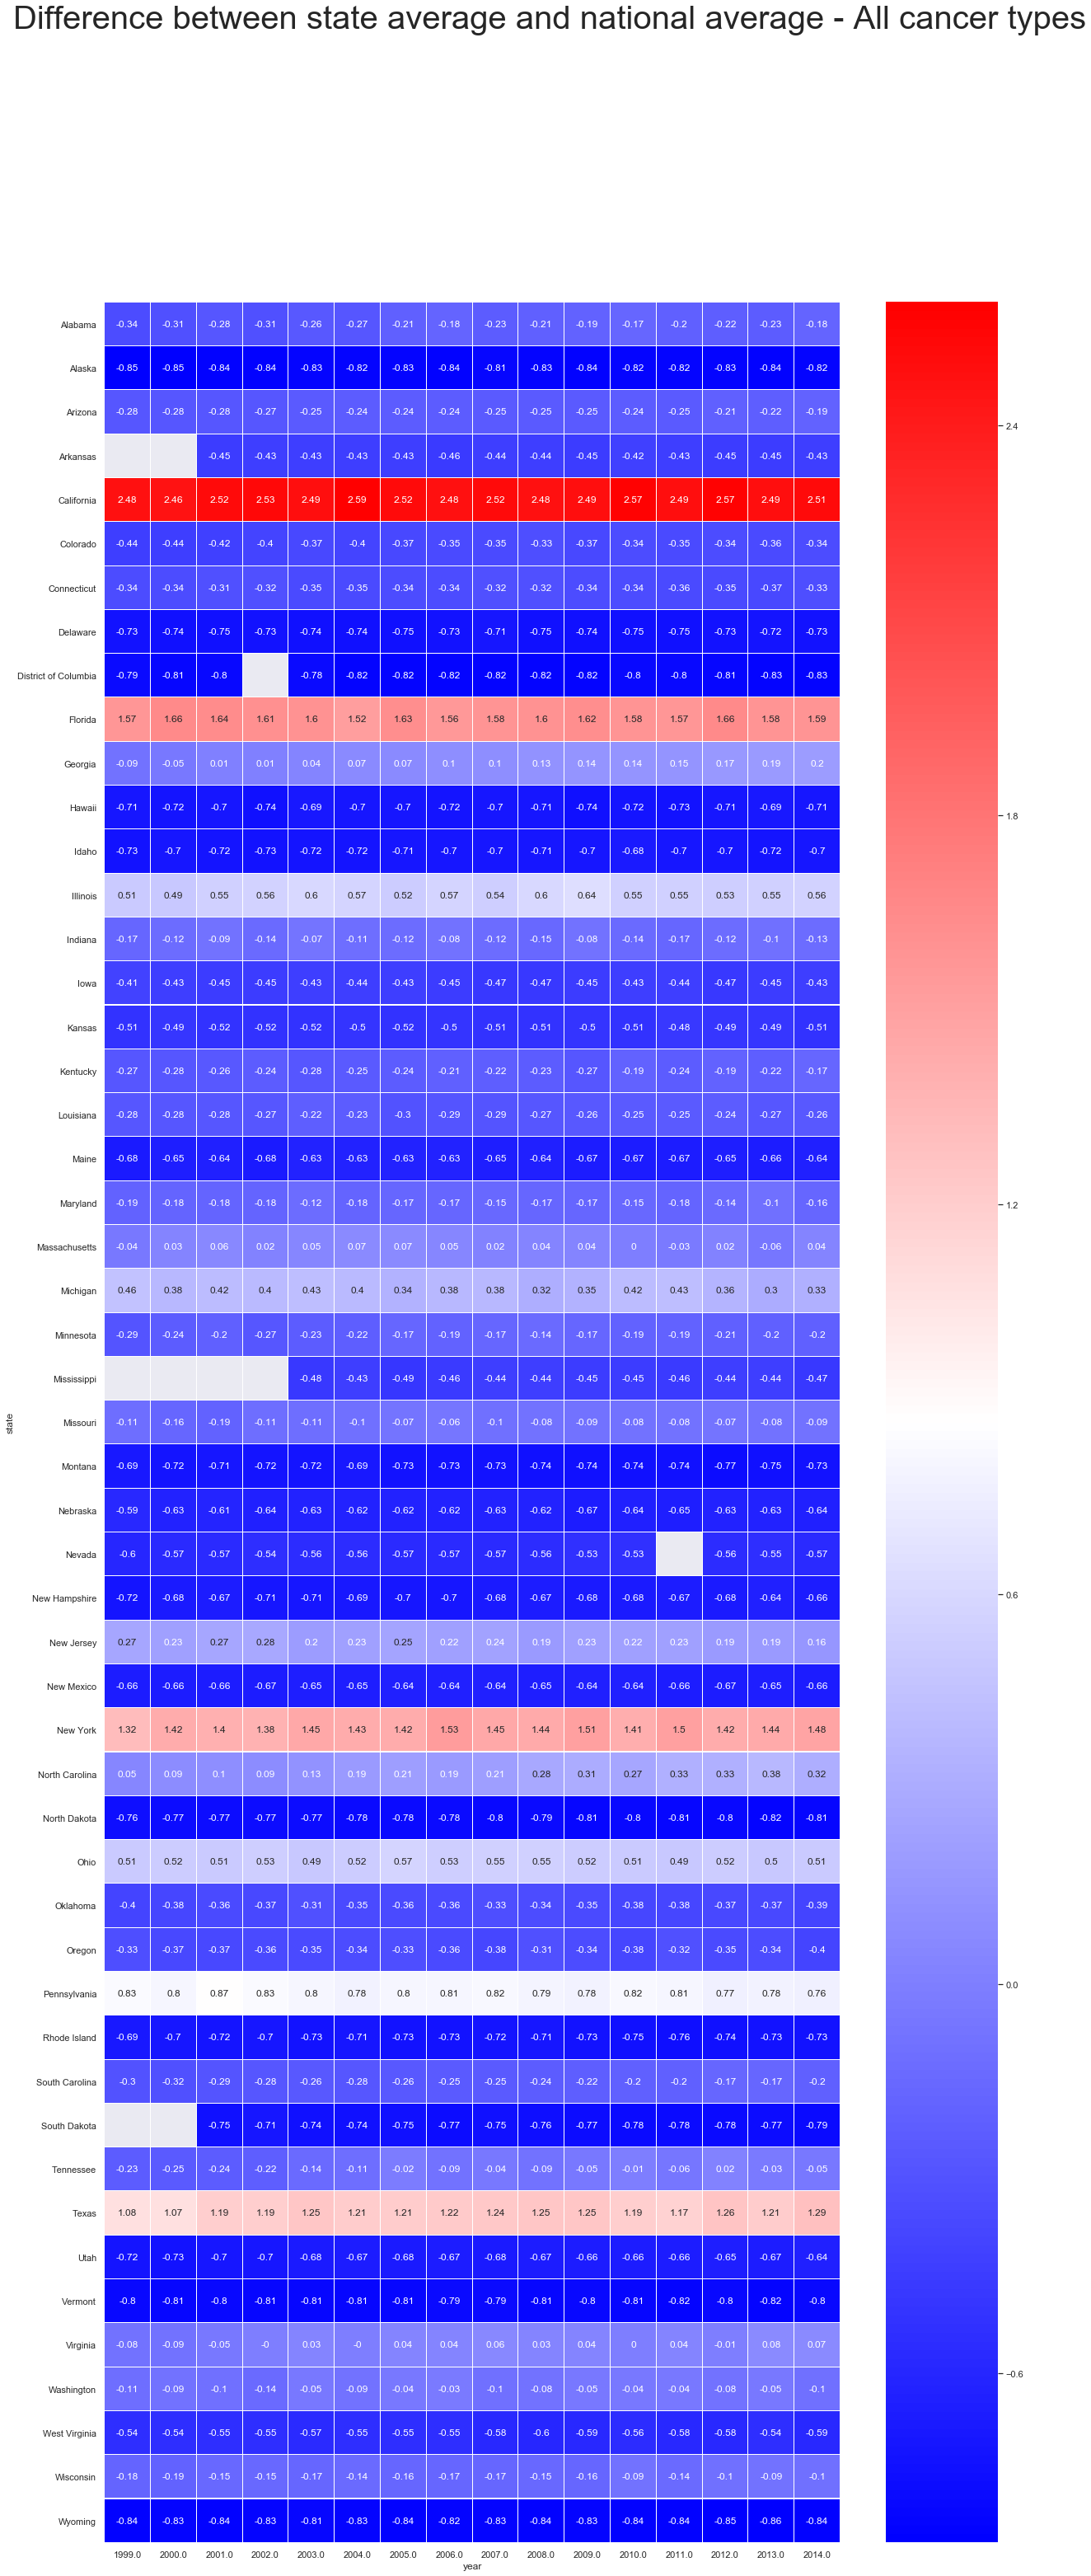

In [61]:
sns.set()

f, ax = plt.subplots(figsize=(20, 50))


result = df.pivot(index='state', columns='year', values='stateToCountryOverall')
sns.heatmap(round(result,2), annot=True, fmt="g", cmap='bwr',linewidths=.1)

t= f.suptitle('Difference between state average and national average - All cancer types', fontsize=40)

f.savefig('Difference between state average and national average - All cancer types')

plt.show()



In [48]:
dfCancerData2 = dfCancerData.loc[:, ['cancer','state','year','count']]

dfCancerData2.head(20)

,cancer,state,year,count
0,Brain,Alabama,1999.0,19.0
1,Brain,Alabama,1999.0,17.0
2,Brain,Alabama,1999.0,21.0
3,Brain,Alabama,1999.0,24.0
4,Brain,Alabama,1999.0,23.0
5,Brain,Alabama,1999.0,31.0
6,Brain,Alabama,1999.0,33.0
7,Brain,Alabama,1999.0,26.0
8,Brain,Alabama,1999.0,29.0
9,Brain,Alabama,2000.0,19.0


In [59]:
def printGraphByCancerType(cancerType):
    
    dfForGraph = dfCancerDataForVisualization[['cancer','state','year','stateToCountryOverall']]
    
    dfForGraph = dfForGraph[dfForGraph.cancer==cancerType]
    dfForGraph = dfForGraph.drop_duplicates()
    
    sns.set()

    f, ax = plt.subplots(figsize=(20, 50))


    result = dfForGraph.pivot(index='state', columns='year', values='stateToCountryOverall')
    sns.heatmap(round(result,2), annot=True, fmt="g", cmap='coolwarm',linewidths=.1)

    t= f.suptitle('Difference between state average and national average - cancer type:' + cancerType, fontsize=40)

    f.savefig('Difference between state average and national average - cancer type:' + cancerType)

    plt.show()

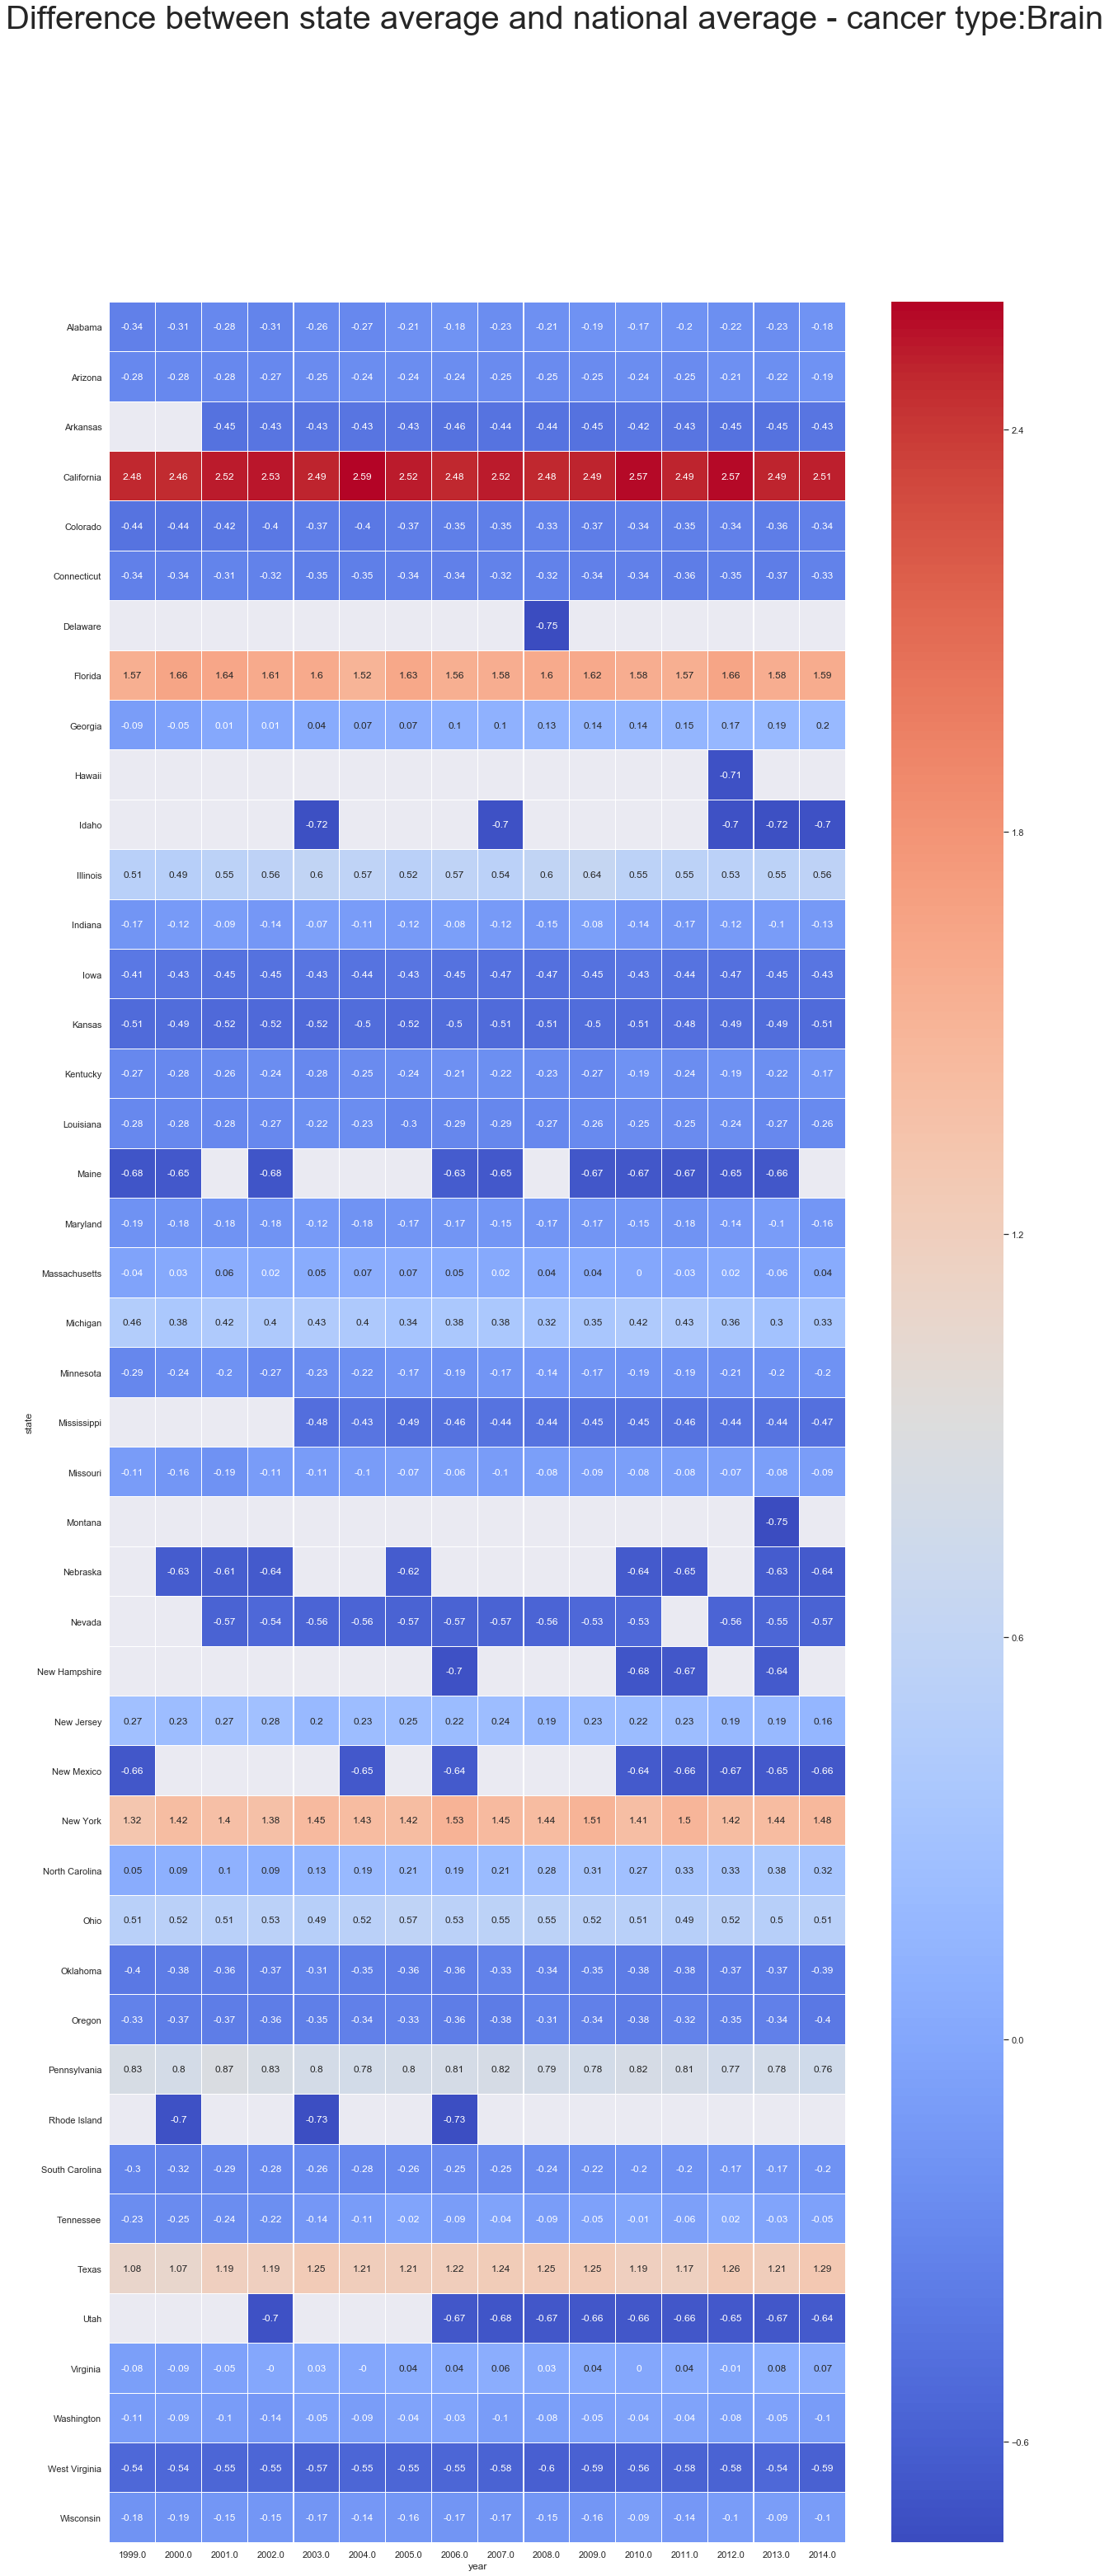

In [60]:
printGraphByCancerType('Brain')

In [ ]:
printGraphByCancerType('Breast')

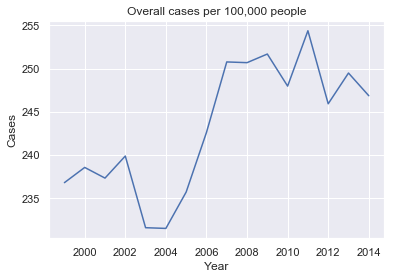

In [66]:
dfForTrendGraph = dfCancerDataForVisualization[['year','meanByYear']]
dfForTrendGraph = dfForTrendGraph.drop_duplicates()

plt.plot(dfForTrendGraph['year'], dfForTrendGraph['meanByYear'])
plt.xlabel('Year')
plt.title('Overall cases per 100,000 people')
plt.ylabel('Cases')